IMPORTING THE PACKAGES I NEED

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle

import random
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,accuracy_score

IMPORTING THE DATASET


In [3]:
dataset=pd.read_csv('data.csv', error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

Trying to Visualize the Dataset


<AxesSubplot:xlabel='strength', ylabel='count'>

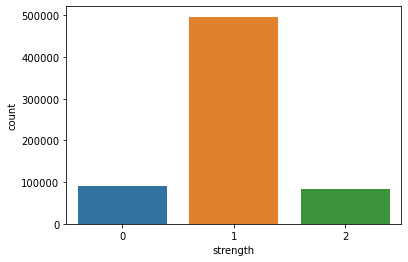

In [4]:
sns.countplot(dataset['strength'])

Creating a array and shuffling it

In [5]:
passwords=np.array(dataset)

In [6]:
import random
random.shuffle(passwords)

Putting the data into X and Y dependent and independent

In [7]:
x = [labels[0] for labels in passwords]
y = [labels[1] for labels in passwords]

Performing TF IDF for data to put into a character array


In [8]:
def word_split(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

Testing the fuction to see the output


In [9]:
print(word_split("steve123"))

['s', 't', 'e', 'v', 'e', '1', '2', '3']


Applying TF-IDF from sklearn package

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=word_split)
X = vectorizer.fit_transform(x)


In [11]:
first_vector_document = X[0]
first_vector_document.T.todense()
tf_idf=pd.DataFrame(first_vector_document.T.todense(),index=vectorizer.get_feature_names(),columns=["TF-IDF"])
tf_idf.sort_values(by=["TF-IDF"],ascending=False)

,TF-IDF
7,0.591526
5,0.567102
z,0.335919
k,0.292083
d,0.285283
...,...
=,0.000000
<,0.000000
;,0.000000
9,0.000000


Spliting the data as training and test 

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Training the model using logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression

classification=LogisticRegression(random_state=0, multi_class = "multinomial")
classification.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

Trying to see what is the accuracy of the model above

In [14]:
from sklearn import metrics

y_pred=classification.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy is : " +str(round(acc*100,2))+"%")



Accuracy is : 82.05%


Trying another classification Algorithm to see the accuracy(Naive Bayes)

In [15]:
classificationNaive=MultinomialNB()
classificationNaive.fit(X_train,y_train)


MultinomialNB()

Checking the accuracy of MultinomialNB

In [16]:
 y_predN=classificationNaive.predict(X_test)

 accN= metrics.accuracy_score(y_test,y_predN)
 print("Accuracy is :"+str(round(accN*100,2))+"%")

Accuracy is :74.4%


Trying another classification Algorithm to see the accuracy (Decision Tree)

In [17]:
from sklearn.tree import DecisionTreeClassifier

classificationD=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
classificationD.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

checking the accuracy of Decision Tree

In [18]:
y_predD=classificationD.predict(X_test)

accD=metrics.accuracy_score(y_test,y_predD)
print("Accuracy is : "+str(round(accD*100,2))+"%")

Accuracy is : 78.28%


Trying another classification Algorithm to see the accuracy (Random Forest)

In [19]:
classificationR=RandomForestClassifier(criterion='entropy',random_state=0)
classificationR.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', random_state=0)

checking the accuracy of Random Forest

In [20]:
y_predR=classificationR.predict(X_test)

accR=metrics.accuracy_score(y_test,y_predR)
print("Accuracy is : "+str(round(accR*100,2))+"%")

Accuracy is : 98.26%


The Accuracy of Random Forest is 98.3% so i decided to take this as the final Algorithm


Predicting a user password to see

In [22]:
password_input=np.array(['JchlhhhaaaACCRS34HHL22'])
strength_output=vectorizer.transform(password_input)

classificationR.predict(strength_output)

array([2])

Strength Ratings

    0 - Weak

    1 - Moderate

    2 - Strong